This is my Julia notes
======================

Have fun using it

In [2]:
println("Hey, you look happy :)")

Hey, you look happy :)


# PyPlot

INFO: Precompiling module PyPlot...
INFO: Recompiling stale cache file /home/simon/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/simon/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/simon/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/simon/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.


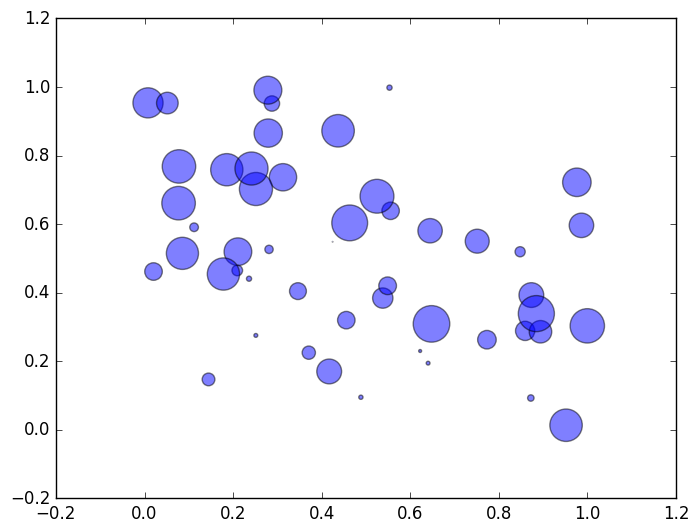

PyObject <matplotlib.collections.PathCollection object at 0x7fb5d83ddac8>

In [3]:
using PyPlot

n = 50
srand(1)
x = rand(n)
y = rand(n)
area = pi .* (15 .* rand(n)).^2 # 0 to 15 point radiuses
scatter(x, y, s=area, alpha=0.5)


# Simple file operation

In [11]:
f = open("lol", "w")
write(f, "trolololololololo")
close(f)

# Zip

In [13]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


# Comprehension

In [14]:
[i + j + k for i in 1:3, j in 4:6, k in 7:9]

3x3x3 Array{Int64,3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

In [ ]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

f(x) = sin(1 / x)

map(x -> sin(1 / x), randn(3))  # Apply function to each element

function simulate(param1, param2; max_iterations=100, error_tolerance=0.01)
    # Function body here
end

# Suprisingly Julia have own rc file

`.juliarc.jl`

In [18]:
(2+3)::ASCIIString

LoadError: LoadError: TypeError: typeassert: expected ASCIIString, got Int64
while loading In[18], in expression starting on line 1

# Derivatives

In [24]:
function numerical_derivative(f, x, dx=0.01)
    derivative = (f(x+dx) - f(x-dx))/2dx
    return derivative
end

function derivative(f)
    return function(x)
        h = x == 0 ? sqrt(eps(Float64)) : sqrt(eps(Float64))*2
        xph = x + h
        dx = xph - x
        f1 = f(xph)
        f0 = f(x)
        return (f1 - f0) / dx
    end
end

function counter(n)
    n = 0
    () -> n += 1, () -> n = 0
end


counter (generic function with 1 method)

In [25]:
sum(n) = n > 1 ? sum(n-1) + n : n
fib(n) = n < 2 ? n : fib(n-1) + fib(n-2)

fib (generic function with 1 method)

# Map

Apply function to each element

In [34]:
map(x -> begin
    if x == 0 return 0
    elseif iseven(x) return 2
    elseif isodd(x) return 1
    end
    end, -3:3)

map(-3:3) do x
    if x == 0 return 0
    elseif iseven(x) return 2
    elseif isodd(x) return 1
    end
end

7-element Array{Int64,1}:
 1
 2
 1
 0
 1
 2
 1

# Filter

Test collection for some case

In [28]:
filter(x -> iseven(x), [1:10;])

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [31]:
mat = [x + y for x in [1:5;], y in [1:3;]]
cubes = Float64[x^3 for x in [1:7;]]

7-element Array{Float64,1}:
   1.0
   8.0
  27.0
  64.0
 125.0
 216.0
 343.0

In [38]:
for (ix, iy) in enumerate([4,33, 77, 45, 2])
    println(ix, " $iy")
end

1 4
2 33
3 77
4 45
5 2


In [45]:
for n = 1:2, m = 1:2
    println(n, " ", m)
end
arr= [1, 2, 3, 4]
while !isempty(arr)
    print(pop!(arr), ", ")
end

1 1
1 2
2 1
2 2
4, 3, 2, 1, 

# Exceptions

In [47]:
throw(DomainError())

LoadError: LoadError: DomainError:
while loading In[47], in expression starting on line 1

In [49]:
warn("this is warning")
info("information")
error("lol, it's an error")

LoadError: LoadError: lol, it's an error
while loading In[49], in expression starting on line 3

INFO: information


In [51]:
throw(CustomException <: Exception end)

LoadError: LoadError: syntax: missing comma or ) in argument list
while loading In[51], in expression starting on line 1

In [62]:
a = []
ret = try
    a.pop!()
catch ex
    if isa(ex, DomainError)
        # smoething
    elseif isa(ex, BoundsError)
        # something else
    end
    println(typeof(ex))
    showerror(STDOUT, ex)
finally
    println("\nwow, that was close")
end
println(ret)

ErrorException
type Array has no field pop!
wow, that was close
nothing


# Scope

In [67]:
anon = cell(2)
for i in 1:2
    anon[i] = () -> println(i)
    i += 1
end
anon[1]()
anon = cell(2)
for i in 1:2
    let i = i
        anon[i] = () -> println(i)
    end
    i += 1
end
anon[1]()

2
1


In [70]:
begin
    local x = 1
    let
        local x = 3
        println(x)
    end
    println(x)
end

i = 0
[i for i = 1:10]
println(i)
for i = 1:10
end
println(i)

3
1
0
10


In [76]:
function fib_producer(n)
    a, b = (0, 1)
    for i = 1:n
        produce(b)
        a, b =(b, a + b)
    end
end
tsk1 = @task fib_producer(2) # Task( () -> func(n) )
info(consume(tsk1))
info(consume(tsk1))
info(consume(tsk1))

INFO: 1
INFO: 1
INFO: nothing


# Arrays

For speed use strongly typed arrays possibly specifing their size

In [91]:
matrix = [1 2; 3 4]
println("my matrix ", matrix)
println("element ", matrix[2, 1]) # first row then column
println("scalar mult ", [1 2] * [3; 4])
# random matrix with 0 to 1 with 3 rows and 5 columns
mat1 = rand(3, 5)
ndims(mat1) # 2
size(mat1) # (3, 5)
size(mat1, 1) # 3
size(mat1, 2) # 5
length(mat1) # 15
nrows, ncols = size(mat1)
idm = eye(3); # 3x3 identity matrix
idm[1:end,2] # idm[:,2] entire second column
idm[2,:] # second row
idmc = idm[2:end, 2:end]
idm[2, :] = 0
idm[2:end, 2:end] = [5 6 ; 9 11]
idm' # transpose(idm)
ma = [1 3; 2 4]
ma * ma' # multiplication
ma .* ma # element-wise multiplication
inv(ma) # inverse of matrix ma * inv(ma) = eye(2) LAPACKException SingularException
# ma1 * X = ma2
# X = ma1 \ ma2 # solver
# X * ma1 = ma2
# X = ma2 / ma1 # solver2
# c = [a b] # beside
# c = [a, b] or [a; b] # below
# reshape(1:12, 3, 4) # matrix 3 row, 4 columns to which the original matrix is changed

## sizehint!(arr, 9) # speed boost
# ImmutableArrays? speeder?

# jagged array - array of arrays
jarr = fill(Array(Int64, 1),3)
jarr[1] = [1, 3, 5]
jarr[2] = [3, 7, 4]
jarr[3] = [1, 7]

my matrix [

2-element Array{Int64,1}:
 1
 7

1 2
 3 4]
element 3
scalar mult [11]


## Array creators

In [104]:
println(cell(2, 2))
println(zeros(2, 2))
println(trues(2, 2))
println(falses(2, 2))
println(fill(2, 2))
println(Array(Int64, 4))
println(Array(Int64, 4))

Any[#undef #undef
    #undef #undef]
[0.0 0.0
 0.0 0.0]
Bool[true true
     true true]
Bool[false false
     false false]
[2,2]
[72058693549555712,281474976710912,140419570098176,0]
[24,19,14,9]


# Tuple

Immutable type which you can unpack like this and that act like array with slicing and indexing

In [90]:
a, b = ('z'::Char, 3.14::Float64)

('z',3.14)

# Dictionary

In [ ]:
# from arrays
# Dict(zip(keys, values))

In [106]:
# strongly typed
dict_s = Dict(1 => "lol", 2 => "trollololol")

Dict{Int64,ASCIIString} with 2 entries:
  2 => "trollololol"
  1 => "lol"

In [109]:
# weakly typed
dict_w = Dict{Any, Any}(:hi => 6, :bye => "bye, bye")

Dict{Any,Any} with 2 entries:
  :hi  => 6
  :bye => "bye, bye"

In [111]:
delete!(dict_w, :bye)

Dict{Any,Any} with 1 entry:
  :hi => 6

In [112]:
haskey(dict_w, :bye)

false

In [113]:
collect(keys(dict_s)) # cretes array

2-element Array{Int64,1}:
 2
 1

# Set

Ordes does not matter, but they are unique

In [116]:
set = Set(Int64[2, 5, 7, 8, 4, 13])

Set([7,4,13,2,5,8])

In [115]:
set2 = Set(Int64[13, 54, 76, 34])

Set([54,13,34,76])

In [120]:
union(set, set2)
intersect(set, set2)
setdiff(set, set2)
setdiff(set, set2)
issubset(set, set2)
issubset(set, Set(Any[7, 13, 50]))

false

# More on types

In [124]:
# n::Int16 or local n::Int16 or n::Int16 = 5
# convert(Int64,7.01) # error
round(Int64, 7.01)


7

In [128]:
promote(0.0, 3//4)
3//4 + 1

7//4

In [133]:
subtypes(Integer)
Bool <: Integer
typeof(true)
isa(true, Bool)

true

## My type

In [148]:
type Point
    x::Float64
    y::Float64
    z::Float64
end

p1 = Point(3.5, 2.67, 1.34)
typeof(p1)
subtypes(Point)
names(Point)
methods(Point)
p1.z

immutable Vector3D
    x::Float64
    y::Float64
    z::Float64
end

typealias Point3D Point

p = Point3D(45, 67, 32)

abstract Employee
type Developer <: Employee
    name::AbstractString
    iq
    favorite_lang::AbstractString
    Developer(name::AbstractString) = new(name, 100, 'C')
end

Developer(name, iq) = Developer(name, iq, "Java")
cleverness(emp::Employee) = emp.iq

type Manager
    name::AbstractString
    iq
    department::AbstractString
end
#man1 = Manager("Julia", 120, "ICT")

# string(p.firstname,	"	",	p.lastname) # more efficient than "$lol"
ManOrDev = Union{Manager, Developer}
cleverer(x::Manager, y::Developer) = x.iq > y.iq ? string(x.name,  " is cleverer") : string(y.name, " is cleverer")

cleverer (generic function with 1 method)

## Parametric types

Something like templates and generic types

In [151]:
type Point2D{T <: Real}
    x::T
    y::T
end

p = Point2D("lol", "trololol")

LoadError: LoadError: invalid redefinition of constant Point2D
while loading In[151], in expression starting on line 1

In [152]:
p = Point2D(1, 4)

Point2D{Int64}(1,4)

### Julia types hierachy

In [153]:
#julia	julia_types.jl	>	tree.txt

# Importing and so on

In [154]:
# require("temperature_converter.jl")
# using	LibC:	varC,	funcC
# import	LibD.funcD 	statement	only	imports	one	name	and	can	also	be	used	if
# funcD 	was	not	exported;	the	function	 funcD 	must	be	used	as	 LibD.funcD .
# importall blahblah
# __init__() # this will run at first time running the module
# include("file.jl") something like copy paste
# push!(LOAD_PATH,	"new/path/to/search")

# Metaprogramming

## Quote symbol

In [157]:
:(2 * 2)

:(2 * 2)

In [160]:
e1 = quote
    x = 3 * 5
    x *= (a - b)
end
e1.head
e1.args
e1.typ

Any

In [161]:
dump(e1)

Expr 
  head: Symbol block
  args: Array(Any,(4,))
    1: LineNumberNode 
      file: Symbol In[160]
      line: Int64 2
    2: Expr 
      head: Symbol =
      args: Array(Any,(2,))
        1: Symbol x
        2: Expr 
          head: Symbol call
          args: Array(Any,(3,))
          typ: Any
      typ: Any
    3: LineNumberNode 
      file: Symbol In[160]
      line: Int64 3
    4: Expr 
      head: Symbol *=
      args: Array(Any,(2,))
        1: Symbol x
        2: Expr 
          head: Symbol call
          args: Array(Any,(3,))
          typ: Any
      typ: Any
  typ: Any


## Expression interpolation

In [162]:
a = 4
e2 = :(a + 4)
e3 = :($a + 4)

:(4 + 4)

## Macros

* Function:	It	takes	the	input	values	and	returns	the	computed	values	at	runtime
* Macro:	It	takes	the	input	expressions	and	returns	the	modified	expressions	at	parse time

In [164]:
macro mname(ex)
    quote
        println("From macro!")# do something with expression
        $ex
        println("See ya...")
    end
end
@mname println("What the hell?") # possibly with parenthesis

From macro!
What the hell?
See ya...


In [170]:
macro assert(ex)
    :($ex == true ? nothing : error(
        string("Assertion failed: ", 
        $(string(ex)))))
end
@assert 1 == 2

LoadError: LoadError: Assertion failed: 1 == 2
while loading In[170], in expression starting on line 6

In [171]:
macroexpand(:(@assert 1 == 2))

:(if (1 == 2) == true
        nothing
    else 
        error(string("Assertion failed: ","1 == 2"))
    end)

In [179]:
macro convarr(arr, T)
    quote
        reshape($T[arr...], size($arr)...) # Note the use of splat
    end
end

arr = ["a", "b", "c"]
@convarr arr Symbol

3-element Array{Symbol,1}:
 :a
 :b
 :c

## Hygienic macro

* Declare	the	variables	used	in	the	macro	as	 local ,	so	as	not	to	conflict	with	the	outer variables
* Use	the	escape	function	 esc 	to	make	sure	that	an	interpolated	expression	is	not expanded,	but	instead	is	used	literally
* Don’t	call	 eval 	inside	a	macro	(because	it	is	likely	that	the	variables	you	are evaluating	don’t	even	exist	at	that	point)

In [197]:
macro timeit(ex)
    quote
        local t0 = time()
        local val =  $(esc(ex))
        local t1 = time()
        print("elapsed time in seconds...")
        @printf "%.3f" t1 - t0
        val
    end
end

@timeit factorial(15)
@time factorial(15)

elapsed time in seconds...0

1307674368000

.000  0.000003 seconds (5 allocations: 176 bytes)


## Tests

They use fuckin' macros... Hooorrraaayy!

In [198]:
using Base.Test

In [199]:
@test 1 === 1.0 # test if is the same

LoadError: LoadError: test failed: 1 is 1.0
 in expression: 1 === 1.0
while loading In[199], in expression starting on line 1

In [200]:
@test 1 == 1.0 # test if equal the same

In [202]:
@test_approx_eq_eps 1 1.0003 0.1 # if is eqaul + epsilon
@test_approx_eq 1 1.0003

LoadError: LoadError: assertion failed: |1 - 1.0003| <= 2.220446049250313e-12
  1 = 1
  1.0003 = 1.0003
  difference = 0.00029999999999996696 > 2.220446049250313e-12
while loading In[202], in expression starting on line 2

# Debugging

In [204]:
@which @test 1==1

do_test(body, qex) at test.jl:49

In [205]:
1 + @show(4*5) + 15

4 * 5 = 20

36

# Benchamrking 

In [206]:
@time factorial(1)

1

0.000006 seconds (4 allocations: 160 bytes)


In [207]:
@elapsed factorial(1)

7.561e-6

In [208]:
@timed factorial(1)

(1,4.379e-6,160,0.0,Base.GC_Diff(160,0,0,4,0,0,0,0,0))

In [209]:
@allocated factorial(1)

0

In [210]:
tic()
factorial(1)
toc() # toq()

elapsed time: 0.

0.045125207

045125207 seconds


# Asynchronous task

In [211]:
a = @async 1 + 2
consume(a)

3

`@sync @parallel @schedule @spawn @spawnat`

# Reflection

In [212]:
typeof(a)

Task

In [213]:
subypes(a)

LoadError: LoadError: UndefVarError: subypes not defined
while loading In[213], in expression starting on line 1

In [216]:
methods(sort)

# 4 methods for generic function "sort":
sort(r::UnitRange{T<:Real}) at range.jl:683
sort(r::Range{T}) at range.jl:686
sort(v::AbstractArray{T,1}) at sort.jl:413
sort(A::AbstractArray{T,N}, dim::Integer) at sort.jl:479

In [217]:
names(Manager)

3-element Array{Symbol,1}:
 :name      
 :iq        
 :department

In [218]:
types(Manager)

LoadError: LoadError: UndefVarError: types not defined
while loading In[218], in expression starting on line 1

In [221]:
code_lowered(*, (Int, Int))

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:x,:y], Any[Any[Any[:x,:Any,0],Any[:y,:Any,0]],Any[],0,Any[]], :(begin  # int.jl, line 19:
        return (Base.box)(Int64,(Base.mul_int)((Base.unbox)(Int64,x),(Base.unbox)(Int64,y)))
    end))))

In [222]:
code_typed(*, (Int, Int))

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:x,:y], Any[Any[Any[:x,Int64,0],Any[:y,Int64,0]],Any[],Any[],Any[]], :(begin  # int.jl, line 19:
        return (Base.box)(Int64,(Base.mul_int)(x::Int64,y::Int64))
    end::Int64))))

In [226]:
code_native(*, (Int, Int))

	.text
Filename: int.jl
Source line: 19
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 19
	imulq	%rsi, %rdi
	movq	%rdi, %rax
	popq	%rbp
	ret


In [227]:
code_llvm(*, (Int, Int))


define i64 @"julia_*_23908"(i64, i64) {
top:
  %2 = mul i64 %1, %0
  ret i64 %2
}


# Garbage collection

In [228]:
# gc() or gc_disable()

# Basic input and output

In [231]:
# read(STDIN, Char) # read one character from STDIN
# readbytes(STDIN, 3) # read 3 bytes and return them in array
# readlines(STDIN) # ends with \r\n on Win and \n in Linux

In [232]:
write(STDOUT, "Julia"); # ends withsemicolon,
# otherwise it would output number of bytes

Julia

## Opening file and reading all lines

In [233]:
# fname = "example.dat"
# fi = open(fname)
# data = readlines(fi)
# for line in data
#     # pass
# end
# close(fi)

# readall(fi) # read to one string

###  Better way to do this

In [235]:
# no memory overhead

# open(fname) do file
#     for line in eachline(file)
#         # pass
#     end
# end

## Write to file
note the write mode `"w"` and append mode `"a"`

In [ ]:
# fname = "example2.dat"
# f2 = open(fname, "w")
# # use write, print, println with f2 as first argument
# clse(f2)

## Read all files in directory

In [ ]:
# for file in readdir() # with optional dir argument for other
#     # process file
# end

## Reading csv

In [ ]:
# data = readdlm("somename.csv", ';') # delimiter is ';'
# data = readcsv("somename.csv") # delimiter is ','
# readdlm("name", ';', Float64, '\n'. header=true)

# row3 = data[3, :]
# column3 = data[:, 3]
# somedata = data[70:75, 2:4]
# somecol = [data[:,3] data[:, 6] data[:, 11]]

# type	Wine
# 				fixed_acidity::Array{Float64}
# 				volatile_acidity::Array{Float64}
# 				citric_acid::Array{Float64}
# 				#	other	fields
# 				quality::Array{Float64}
# end

# wine1 = Wine(data[1, :]...) # splatted to get the data

# writedlm("partial.dat" data, ';') or writecsv("data.dat", data)

# fname	=	"savetuple.csv"
# csvfile	=	open(fname,"w")
# #	writing	headers:
# write(csvfile,	"ColName	A,	ColName	B,	ColName	C\n")
# for	i	=	1:10
# 		tup(i)	=	tuple(rand(Float64,3)...)
# 		write(csvfile,	join(tup(i),","),	"\n")
# end
# close(csvfile)

# DataFrames

In [ ]:
# using DataFrames
# using DataArrays
# using RDatasets

# DataArrays
# dv = @data([7, 4, 6, 8, NA])
# sum(dv) # returns NA
# sum(dropna(dv)) # returns 15
# repl = -1
# sum(array(dv, repl)) # returns 13

# TCP Server

In [236]:
# server	=	listen(8081)
# while	true
# 		conn	=	accept(server)
# 		@async	begin
# 				try
# 						while	true
# 								line	=	readline(conn)
# 								println(line)		#	output	in	server	console
# 								write(conn,line)
# 						end
# 				catch	ex
# 						print("connection	ended	with	error	$ex")
# 				end
# 		end	#	end	coroutine	block
# end

# listen(IPv6(0),2001) # listen on all IPv6 interfaces on 2001 port

# read less, like a byte or Char
# read(conn,	Char)
# read(conn,	Uint8)

# TCP Client

In [ ]:
# 	conn	=	connect(8081)	#>	TcpSocket(open,	0	bytes	waiting)
# 						write(conn,	"Do	you	hear	me?\n")

# Parallelization

You can split job to workers, but they don't share mamory.
Use `addprocs()` to create new workers even remotely (check for help) or start julia with `julia -p n` where `n` is number of workers

You should separete your program into two files `driver.jl` and `functions.jl` then `require("functions")` in `driver.jl` or start Julia with this syntax `julia -p n -L lol.jl driver.jl` lol.jl being the file to share between workers.


In [238]:
# julia	-p	n			#	starts	REPL	with	n	workers

In [239]:
workers()

1-element Array{Int64,1}:
 1

In [240]:
# addprocs(5)
# julia	--machinefile	machines	driver.jl

In [241]:
# r1	=	remotecall(2,	x	->	x^2,	1000)	
# fetch(r1)
# remotecall_fetch(5,	sin,	2pi) # immediate return
# r2	=	@spawnat	4	sqrt(2)	#	lets	worker	4	calculate	sqrt(2)
# fetch(r2)		#	returns	1.4142135623730951
# r	=	[@spawnat	w	sqrt(5)	for	w	in	workers()]
# fetch(r[3])	#	returns	2.23606797749979
# @everywhere println(myid())
# r3 = @spawn println(myid())
# fetch(r3)

# @everywhere	include("defs.jl")
# @everywhere x = 3

# 	require("functions") # make modeule available everywhere
# for	pid	in	workers()
# 				remotecall(pid,	x	->	(global	d;	d	=	x;	nothing),	d)
# end

## Parallel macro for loop

In [242]:
# count = @parallel (+) for 1:10
#     # do something
# end

## Parallel map - `pmap(f, coll)`

In [243]:
# Wrong
# @parallel	for	i=1:100000
# 		arr[i]	=	i
# end

pmap((x) -> x*2, 1:10)

10-element Array{Any,1}:
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

## Distributed array DArray

Look in docs, removed from Base

# External interactions with other languages out there

## Shell

In [272]:
whoami = readall(`whoami`)
cmd = `ls /home/$whoami/` # creates a Cmd type
(run(cmd))

ls: cannot access /home/simon
/: No such file or directory


LoadError: LoadError: failed process: Process(`ls '/home/simon
/'`, ProcessExited(2)) [2]
while loading In[272], in expression starting on line 3

## C and FORTRAN

In [258]:
lang	=	ccall(	(:getenv,	"libc"),	Ptr{Uint8},	(Ptr{Uint8},),	"LANGUAGE")

  likely near In[258]:1
  likely near In[258]:1
  likely near In[258]:1
  likely near In[258]:1
  likely near In[258]:1
  likely near In[258]:1
  likely near In[258]:1


Ptr{UInt8} @0x00007ffd77800c4a

In [259]:
bytestring(lang)

"en_US"

## Python

In [260]:
# using	PyCall
# pyeval("10*10")	#>	100
# @pyimport	math
# math.sin(math.pi	/	2)	#>	1.0

# Performance tips
* Refrain	from	using	global	variables.	If	unavoidable,	make	them	constant,	or	at	least annotate	the	types.	It	is	better	to	use	local	variables	instead;	they	are	often	only	kept on	the	stack	(or	even	in	registers),	especially	if	they	are	immutable.
* Structure	your	code	around	functions	that	do	their	work	on	local	variables	via	the function	arguments,	and	this	returns	their	results	rather	than	mutating	the	global objects.
* Type	stability	is	very	important: Avoid	changing	the	types	of	variables	over	time
* The	return	type	of	a	function	should	only	depend	on	the	type	of	the	arguments
```Julia
function	myFunc{T,U}(a::T,	b::U,	c::Int)
		#	code
end
```
Even	if	you	do	not	know	the	types	that	will	be	used	in	a	function,	but	you	do	know	it
will	always	be	of	the	same	type	 T 	and	 U ,	then	functions	should	be	defined	keeping
that	in	mind,	as	in	this	code	snippet:
* If	large	arrays	are	needed,	indicate	their	final	size	with	 sizehint 	from	the	start	(refer to	the	Ranges	and	Arrays	section	of	Chapter	2,	Variables,	Types,	and	Operations).
* If	 arr 	is	a	very	large	array	that	you	no	longer	need,	you	can	free	the	memory	it occupies	by	setting	 arr	=	nothing .	The	occupied	memory	will	be	released	the	next time	the	garbage	collector	runs.	You	can	force	this	to	happen	by	invoking	 gc() .
* In	certain	cases	(such	as	real-time	applications),	disabling	garbage	collection (temporarily)	with	 gc_disable() 	can	be	useful.
* Use	named	functions	instead	of	anonymous	functions.
* In	general,	use	small	functions.
* Don’t	test	for	the	types	of	arguments	inside	a	function,	use	an	argument	type annotation	instead.
* If	necessary,	code	different	versions	of	a	function	(several	methods)	according	to	the types,	so	that	multiple	dispatch	applies.	Normally,	this	won’t	be	necessary,	because the	JIT	compiler	is	optimized	to	deal	with	the	types	as	they	come.
* Use	types	for	keyword	arguments;	avoid	using	the	splat	operator	( ... )	for	dynamic	lists of	keyword	arguments.
* Using	mutating	APIs	(functions	with	 ! 	at	the	end)	is	helpful,	for	example,	to	avoid copying	large	arrays.
* Prefer	array	operations	to	comprehensions,	for	example,	 x.^2 	is	considerably	faster than	 [val^2	for	val	in	x] .
* Don’t	use	 try / catch 	in	the	inner	loop	of	a	calculation.
* Use	immutable	types	(cfr.	package	 ImmutableArrays ).
* Avoid	using	type	 Any ,	especially	in	collection	types.
* Avoid	using	abstract	types	in	a	collection.
* Type	annotate	fields	in	composite	types.
* Avoid	using	a	large	number	of	variables,	large	temporary	arrays,	and	collections, because	this	provokes	much	garbage	collection.	Also,	don’t	make	copies	of	variables if	you	don’t	have	to.* Avoid	using	string	interpolation \(`$`\)	when	writing	to	a	file,	just	write	the	values.
* Devectorize	your	code,	that	is,	use	explicit	 for 	loops	on	array	elements	instead	of simply	working	with	the	arrays	and	matrices.	(This	is	exactly	the	opposite	advice	as commonly	given	to	R,	MATLAB,	or	Python	users.)
* If	appropriate,	use	a	parallel	reducing	form	with	 @parallel 	instead	of	a	normal	 for loop	(refer	to	Chapter	8,	I/O,	Networking,	and	Parallel	Computing).
* Reduce	data	movement	between	workers	in	a	parallel	execution	as	much	as	possible (refer	to	Chapter	8,	I/O,	Networking,	and	Parallel	Computing).
* Fix	deprecation	warnings.
* Use	the	macro	 @inbounds 	so	that	no	array	bounds	checking	occur	in	expressions	(if you	are	absolutely	certain	that	no	 BoundsError 	occurs!).
* Avoid	using	 eval 	at	runtime.

# Tools

## Linter

In [ ]:
# Pkg.add("Lint")
# lintpkg("MyPackage") for linting an entire package
# lintfile("my_file.jl") for linting a file
# lintstr("my string") for linting a string

## Profiler

In [261]:
# @profile # in standard library

# Other stuff

In [262]:
filter(x	->	iseven(x),	1:10)

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [263]:
sum(map(x	->	sqrt(x),	1:10))
mapreduce(x	->	sqrt(x),	+,	1:10)
1:10	|>	(x	->	sqrt(x))	|>	sum
1:10	|>	sqrt	|>	sum

LoadError: LoadError: MethodError: `isless` has no method matching isless(::Int64, ::Array{Float64,1})
Closest candidates are:
  isless(::Real, !Matched::AbstractFloat)
  isless(::Real, !Matched::Real)
  isless(::Integer, !Matched::Char)
while loading In[263], in expression starting on line 1

In [ ]:
# a = 1
# clipboard(a)
# workspace()
# a = clipboard()
# sudo	apt-get	install	xclip

## Your package

Directory `src` and `test` with `runtests.jl` file. Files `REQUIRE`, `LICENSE.md` and `README.md` in root of your project.

`REQUIRE` should look like this:
```
julia 0.4.2-
somepackage
```

* Fork METADATA.jl
* Clone it
* create a new branch with your package
* commit
* push to --set-upstream origin yourpackage
* pull request



## PyPlot

* `plot(y)` ,	 `plot(x,y)` 	plots	y	versus	x	using	the	default	line	style	and	color
* `semilogx(x,y)` ,	 `semilogy(x,y)`	for	log	scale	plots
* `title("A	title")` ,	 `xlabel("x-axis")` ,	and	 `ylabel("foo")` 	to	set	labels
* `legend(["curve	1",	"curve	2"],	"northwest")` 	to	write	a	legend	at	the upper-left	side	of	the	graph
* `grid()` ,	 `axis(	"equal")` 	adds	grid	lines,	and	uses	equal	 x 	and	 y 	scaling
* `title(L"the	curve	$e^\sqrt{x}$")` 	sets	the	title	with	LaTeX	equation
* `savefig(	"fig.png")` ,	 `savefig(	"fig.eps")`	saves	as	the	PNG	or	EPS	image

## [Gadfly](http://gadflyjl.org/)

```
draw(SVG("gadfly.svg",6inch,3inch),	plot([x	->	x^2],0,	25))
pl	=	plot([x	->	cos(x)/x],	5,	25)
draw(PNG("gadfly.png",	300,	100),	pl)
```